## Name: Jillian DeWoody
## UNI: jd4127

In [17]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, brier_score_loss
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import ParameterGrid

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
# from category_encoders import TargetEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.metrics import brier_score_loss
# from sklearn.calibration import CalibratedClassifierCV
# from sklearn.calibration import CalibrationDisplay

import kagglehub
import glob
from pathlib import Path
import matplotlib.image as mpimg
from PIL import Image
import os

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import random

In [18]:
# Ignore (old dataset)

# import kagglehub

# path = kagglehub.dataset_download("paultimothymooney/breast-histopathology-images")

# print("Path to dataset files:", path)


**Run the code below to convert TotalCharges to numeric**


In [19]:
# Ignore (old dataset)

# import glob
# from pathlib import Path

# # types of cancer
# count_class_0 = 0
# count_class_1 = 1

# breast_img_paths = glob.glob('/Users/jilliandewoody/.cache/kagglehub/datasets/paultimothymooney/breast-histopathology-images/**/*.png', recursive = True)

# for img_path in breast_img_paths:
#     if('class0' in img_path):
#         count_class_0 += 1
#     elif('class1' in img_path):
#         count_class_1 += 1

# count_by_class = pd.DataFrame({'Class': ['Non-IDC', 'IDC'], 'Count': [count_class_0, count_class_1]})
# plt.bar(count_by_class['Class'], count_by_class['Count'])
# plt.title("Count of images by class")
# plt.ylabel("Count")
# plt.show()

In [20]:
# Download latest version

path = kagglehub.dataset_download("ambarish/breakhis")

print("Path to dataset files:", path)

Path to dataset files: /Users/Claudia/.cache/kagglehub/datasets/ambarish/breakhis/versions/4


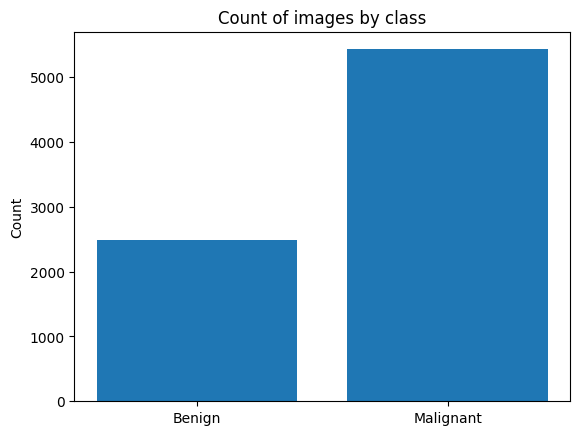

In [21]:
# Update to your local path --> 
random.seed(42)
np.random.seed(42)

img_path = glob.glob('/Users/Claudia/.cache/kagglehub/datasets/ambarish/breakhis/**/*.png', recursive = True)

benign = []
malignant = []

for img in img_path:
    img_name = Path(img).name
    
    if img_name[4] == 'B':
        benign.append(img)
    else:
        malignant.append(img)

count_by_class = pd.DataFrame({'Class': ['Benign', 'Malignant'], 'Count': [len(benign), len(malignant)]})
plt.bar(count_by_class['Class'], count_by_class['Count'])
plt.title("Count of images by class")
plt.ylabel("Count")
plt.show()

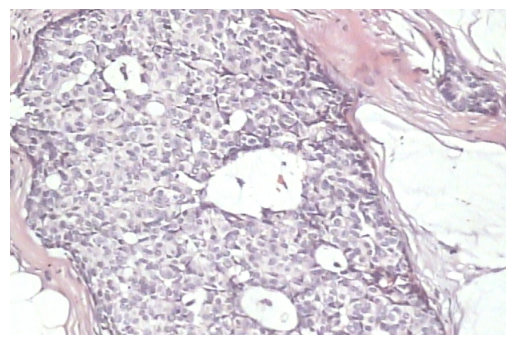

In [22]:
img_benign = mpimg.imread(malignant[1])
plt.imshow(img_benign)
plt.axis("off")  # Hide axes
plt.show()

In [20]:
# # Read and flatten images into a 2D array (each row is a flattened image)


# img = Image.open(benign[0])
# img = img.resize((700, 460))  # Optional: resize images to a consistent size
# img_array = np.array(img)  # Image as (height, width, channels)
# img_array = img_array.flatten()  # Flatten to 1D vector
# print(img_array)

# # scaler = StandardScaler()
# # img_array_scaled = scaler.fit_transform(img_array.reshape(1, -1))

# # print(img_array_scaled)
# # image_arrays = []
# # for img_file in img_path:
# #     img = Image.open(img_file)
# #     img = img.resize((700, 460))  # Optional: resize images to a consistent size
# #     img_array = np.array(img)  # Image as (height, width, channels)
# #     image_arrays.append(img_array.flatten())  # Flatten to 1D vector

# # # Convert list to NumPy array
# # X = np.array(image_arrays)

# # # Optionally, standardize the data (mean=0, std=1)
# # scaler = StandardScaler()
# # X_scaled = scaler.fit_transform(X)

[193 181 201 ... 215 217 232]


In [ ]:
# # Read and flatten images into a 2D array (each row is a flattened image)
# image_arrays = []
# for img_file in img_path[:200]:
#     #img_path_b = os.path.join(folder_path, img_file)
#     img = Image.open(img_file)
#     img = img.resize((700, 460))  # Optional: resize images to a consistent size
#     img_array = np.array(img)  # Image as (height, width, channels)
#     image_arrays.append(img_array.flatten())  # Flatten to 1D vector

# # Convert list to NumPy array
# X = np.array(image_arrays)

# # Optionally, standardize the data (mean=0, std=1)
# # scaler = StandardScaler()
# # X_scaled = scaler.fit_transform(X)

# X_scaled = X/255

# print(X_scaled)

[[0.98039216 0.97647059 0.95686275 ... 0.8627451  0.85882353 0.87843137]
 [0.8        0.76078431 0.79607843 ... 0.97254902 1.         0.97254902]
 [0.65882353 0.58431373 0.65882353 ... 0.7254902  0.6745098  0.70196078]
 ...
 [0.51372549 0.42352941 0.5372549  ... 0.76470588 0.61568627 0.77647059]
 [0.83529412 0.85882353 0.85882353 ... 0.82352941 0.61960784 0.77254902]
 [0.81960784 0.7254902  0.78039216 ... 0.83137255 0.84313725 0.87843137]]


Generating ~3020 augmented images...


  0%|          | 0/2480 [00:00<?, ?it/s]

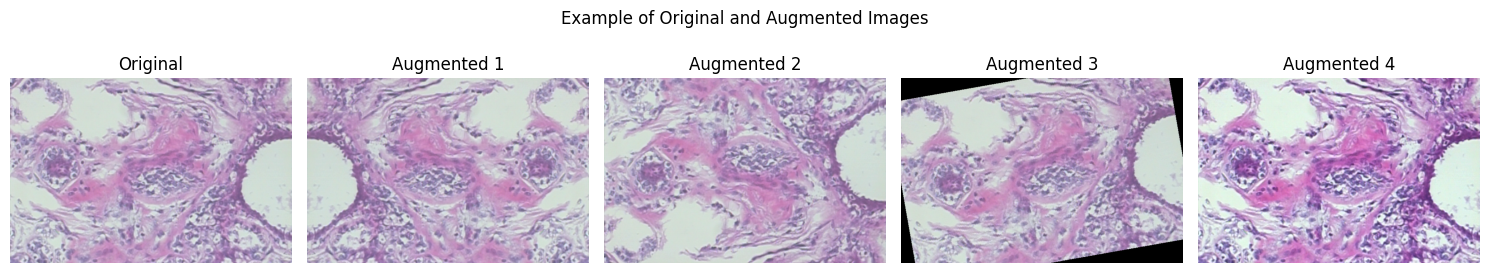

100%|██████████| 2480/2480 [02:38<00:00, 15.66it/s]

Generated 3020 new benign images.
Total benign images after augmentation: 5500


In [23]:
from tqdm import tqdm
from PIL import Image, ImageEnhance, ImageOps
import random
from pathlib import Path
import os

# Source benign images
benign_images = [img for img in img_path if Path(img).name[4] == 'B']
output_dir = "/Users/Claudia/augmented_benign"
os.makedirs(output_dir, exist_ok=True)

# Define augmentations
def augment_image(img):
    aug_list = []

    aug_list.append(ImageOps.mirror(img))                      # Horizontal flip
    aug_list.append(ImageOps.flip(img))                        # Vertical flip
    aug_list.append(img.rotate(random.randint(-30, 30)))       # Rotation
    aug_list.append(ImageEnhance.Contrast(img).enhance(1.5))   # Contrast boost

    return aug_list

# Augment benign images to reach ~5500 total
target_total = 5500
n_to_generate = target_total - len(benign_images)
images_needed_per_image = (n_to_generate // len(benign_images)) + 1

print(f"Generating ~{n_to_generate} augmented images...")

augmented_count = 0
for img_path_b in tqdm(benign_images):
    img = Image.open(img_path_b).resize((700, 460))
    augmented_imgs = augment_image(img)

    for aug_img in augmented_imgs[:images_needed_per_image]:
        if augmented_count >= n_to_generate:
            break
        new_name = f"{Path(img_path_b).stem}_aug{augmented_count}.png"
        aug_path = os.path.join(output_dir, new_name)
        aug_img.save(aug_path)

        # ✅ Append to the benign list directly
        benign.append(aug_path)
        if augmented_count == 0:  # Show for first image only
            plt.figure(figsize=(15, 3))
            plt.subplot(1, len(augmented_imgs) + 1, 1)
            plt.imshow(img)
            plt.title("Original")
            plt.axis("off")

            for i, aug_img in enumerate(augmented_imgs):
                plt.subplot(1, len(augmented_imgs) + 1, i + 2)
                plt.imshow(aug_img)
                plt.title(f"Augmented {i+1}")
                plt.axis("off")
            
            plt.suptitle("Example of Original and Augmented Images")
            plt.tight_layout()
            plt.show()
        augmented_count += 1
        

print(f"Generated {augmented_count} new benign images.")
print(f"Total benign images after augmentation: {len(benign)}")


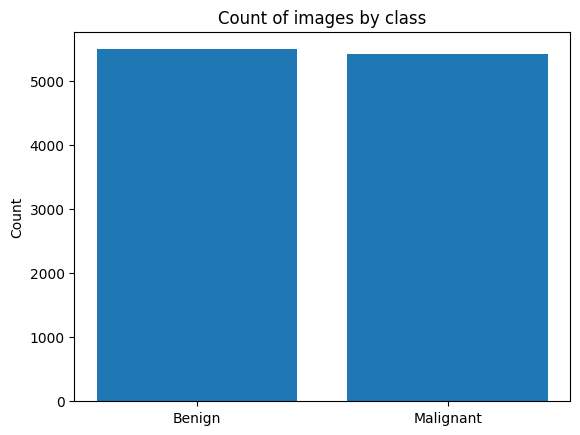

Train: 7654, Val: 1635, Test: 1640


In [24]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image

# Step 1: Assign labels and combine
# benign → 0, malignant → 1
#ensure consistency between runs for file crawling
benign = sorted(benign) 
malignant = sorted(malignant) 
image_paths = benign + malignant
labels = [0] * len(benign) + [1] * len(malignant)

# Step 2: Shuffle together to avoid ordering bias
combined = list(zip(image_paths, labels))
random.seed(42)
random.shuffle(combined)
image_paths, labels = zip(*combined)


# combined = list(zip(image_paths, labels))
# random.shuffle(combined)
# image_paths, labels = zip(*combined)  # unzip
# image_paths = list(image_paths)
# labels = list(labels)

# Step 3: Show class distribution
count_by_class = pd.DataFrame({'Class': ['Benign', 'Malignant'], 'Count': [labels.count(0), labels.count(1)]})
plt.bar(count_by_class['Class'], count_by_class['Count'])
plt.title("Count of images by class")
plt.ylabel("Count")
plt.show()

# Step 4: Split dataset (70% train, 15% val, 15% test — stratified)
X_temp, X_test, y_temp, y_test = train_test_split(
    image_paths, labels, test_size=0.15, stratify=labels, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, stratify=y_temp, random_state=42
)  # ≈ 15% of total


print(f"Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")


In [26]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from PIL import Image
from tqdm import tqdm

# Generator for batch-wise image loading
def image_batch_generator(image_paths, labels, batch_size=32, resize_to=(128, 128)):
    num_samples = len(image_paths)
    while True:  # Infinite generator
        for i in range(0, num_samples, batch_size):
            batch_paths = image_paths[i:i+batch_size]
            batch_labels = labels[i:i+batch_size]

            batch_images = []
            for path in batch_paths:
                img = Image.open(path).resize(resize_to)
                img_array = np.array(img).astype(np.float32) / 255.0
                batch_images.append(img_array)
                # batch_images.append(img_array.flatten())

            yield np.array(batch_images), np.array(batch_labels)

# Helper to build full dataset from generator

def create_full_dataset(dataset_len, generator, batch_size=64, desc="Processing"):
    X_full, y_full = [], []
    num_batches = dataset_len // batch_size + int(dataset_len % batch_size != 0)

    for _ in tqdm(range(num_batches), desc=desc):
        xb, yb = next(generator)
        X_full.append(xb)
        y_full.append(yb)

    X_final = np.vstack(X_full)
    y_final = np.hstack(y_full)
    return X_final, y_final

# Create generators for each split
train_gen = image_batch_generator(X_train, y_train, batch_size=64, resize_to=(128, 128))
val_gen = image_batch_generator(X_val, y_val, batch_size=64, resize_to=(128, 128))
test_gen = image_batch_generator(X_test, y_test, batch_size=64, resize_to=(128, 128))

# Generate full datasets from batches
X_train_final, y_train_final = create_full_dataset(len(X_train), train_gen, batch_size=64,desc="Building Train Set")
X_val_final, y_val_final = create_full_dataset(len(X_val), val_gen, batch_size=64, desc="Building Validation Set")
X_test_final, y_test_final = create_full_dataset(len(X_test), test_gen, batch_size=64, desc="Building Test Set")

# Normalize (standardize) the flattened image arrays
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_final)
# X_val_scaled = scaler.transform(X_val_final)
# X_test_scaled = scaler.transform(X_test_final)

Building Test Set: 100%|██████████| 26/26 [00:24<00:00,  1.06it/s]


Train dataset


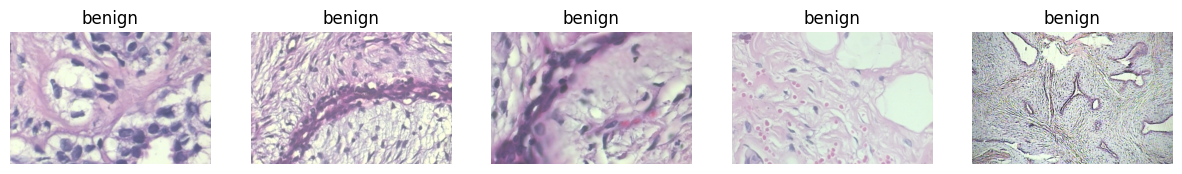

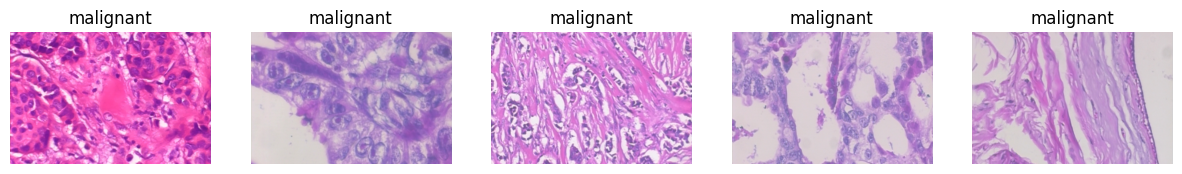

Validation dataset


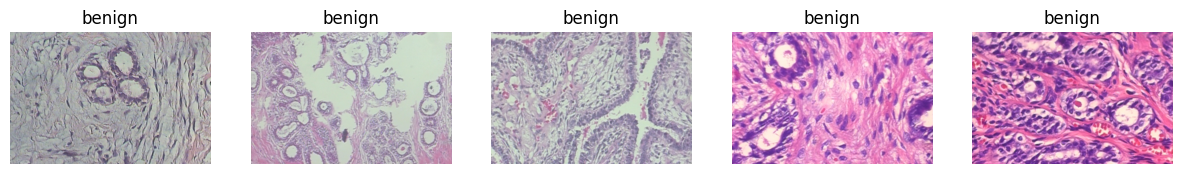

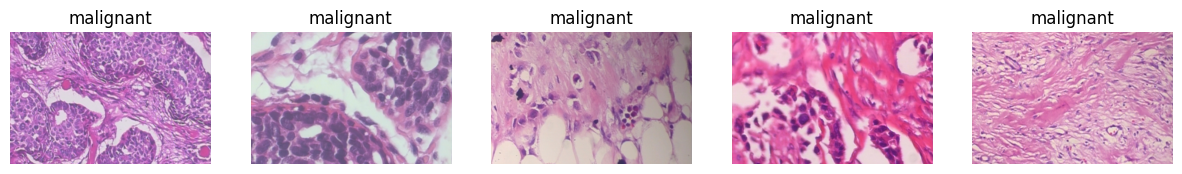

Test dataset


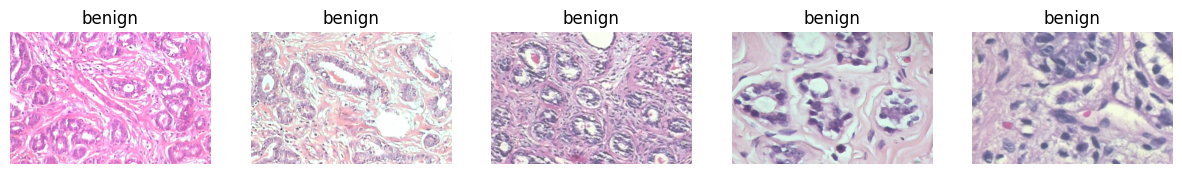

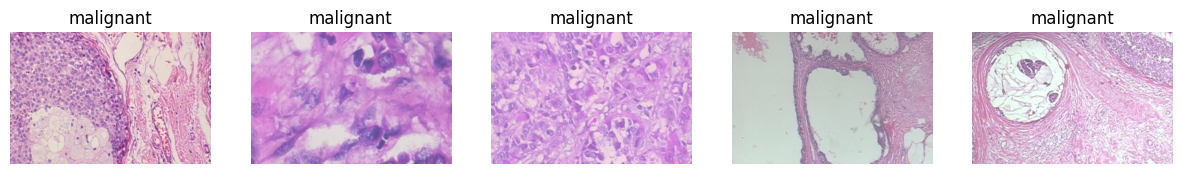

In [28]:
#plot the images
def view_samples(X, y, label_name="benign", num_samples=5):
    label = 0 if label_name == "benign" else 1
    indices = [i for i, lbl in enumerate(y) if lbl == label]
    sample_paths = random.sample([X[i] for i in indices], num_samples)

    plt.figure(figsize=(15, 3))
    for i, path in enumerate(sample_paths):
        img = Image.open(path)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(label_name)
    plt.show()

# Example usage
print("Train dataset")
view_samples(X_train, y_train, label_name="benign")
view_samples(X_train, y_train, label_name="malignant")
print("Validation dataset")
view_samples(X_val, y_val, label_name="benign")
view_samples(X_val, y_val, label_name="malignant")
print("Test dataset")
view_samples(X_test, y_test, label_name="benign")
view_samples(X_test, y_test, label_name="malignant")

In [31]:
# 1A. MLP: Flatten and Standardize
X_train_mlp = X_train_final.reshape((X_train_final.shape[0], -1))
X_val_mlp = X_val_final.reshape((X_val_final.shape[0], -1))
X_test_mlp = X_test_final.reshape((X_test_final.shape[0], -1))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_mlp = scaler.fit_transform(X_train_mlp)
X_val_mlp = scaler.transform(X_val_mlp)
X_test_mlp = scaler.transform(X_test_mlp)

# 1B. CNN: No flattening or scaling, just ensure shape = (N, H, W, C)
X_train_cnn = X_train_final
X_val_cnn = X_val_final
X_test_cnn = X_test_final

In [32]:
#MLP Training
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Basic training on MLP
input_shape_mlp = X_train_mlp.shape[1]         # e.g. 128*128*3 = 49,152
input_shape_cnn = X_train_cnn.shape[1:]        # (128, 128, 3)

early_stop = EarlyStopping(patience=3, restore_best_weights=True)

mlp = Sequential([
    Dense(256, activation='relu', input_shape=(input_shape_mlp,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

mlp.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train MLP
mlp.fit(X_train_mlp, y_train_final, validation_data=(X_val_mlp, y_val_final),
        epochs=20, batch_size=64, callbacks=[early_stop])

mlp.evaluate(X_test_mlp, y_test_final)

/Users/Claudia/anaconda3/envs/tf_hw_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 18s 136ms/step - accuracy: 0.6953 - loss: 5.4245 - val_accuracy: 0.7890 - val_loss: 1.0564
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.7482 - loss: 1.3120 - val_accuracy: 0.8037 - val_loss: 0.4505
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.7859 - loss: 0.5153 - val_accuracy: 0.7976 - val_loss: 0.4297
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.8034 - loss: 0.4434 - val_accuracy: 0.8135 - val_loss: 0.4184
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.8224 - loss: 0.3975 - val_accuracy: 0.8135 - val_loss: 0.4046
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 16s 134ms/step - accuracy: 0.8254 - loss: 0.3952 - val_accuracy: 0.8232 - val_loss: 0.3963
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 120ms/step - accuracy: 0.8408 - loss: 0.3515 - val_accuracy: 0.8275 - val_loss: 0.3932
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 15s 110ms/step - accuracy: 0.8586 - loss: 0.33

[0.3935040831565857, 0.8079268336296082]

Total configurations: 12

🔧 Training model 1/12: {'dropout_rate': 0.2, 'hidden_layer_sizes': (128,), 'learning_rate': 0.001}
Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.7175 - loss: 7.4402 - val_accuracy: 0.7768 - val_loss: 4.9081
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - accuracy: 0.8292 - loss: 3.2745 - val_accuracy: 0.8220 - val_loss: 2.7589
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.8743 - loss: 1.7032 - val_accuracy: 0.8061 - val_loss: 2.6765
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.8951 - loss: 1.2211 - val_accuracy: 0.7725 - val_loss: 3.1789
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9367 - loss: 0.6136 - val_accuracy: 0.8196 - val_loss: 2.5739
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.9280 - loss: 0.7106 - val_accuracy: 0.8245 - val_loss: 2.1228
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.9497 - loss: 0.3429 - val_accurac

/Users/Claudia/anaconda3/envs/tf_hw_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.7068 - loss: 3.3710 - val_accuracy: 0.7939 - val_loss: 1.8798
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.8410 - loss: 1.7138 - val_accuracy: 0.7835 - val_loss: 2.6681
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.8747 - loss: 1.1447 - val_accuracy: 0.8031 - val_loss: 2.0754
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.8946 - loss: 0.9656 - val_accuracy: 0.8147 - val_loss: 2.0734
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.9220 - loss: 0.6328 - val_accuracy: 0.7755 - val_loss: 3.9525
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.9326 - loss: 0.5498 - val_accuracy: 0.8343 - val_loss: 1.9056
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.9413 - loss: 0.4306 - val_accuracy: 0.8031 - val_loss: 2.1796
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.9502 - loss: 0.2863 - val_ac

/Users/Claudia/anaconda3/envs/tf_hw_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 104ms/step - accuracy: 0.7058 - loss: 4.6671 - val_accuracy: 0.7431 - val_loss: 0.9334
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 18s 147ms/step - accuracy: 0.7525 - loss: 1.1278 - val_accuracy: 0.7774 - val_loss: 0.4533
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.7991 - loss: 0.4555 - val_accuracy: 0.8006 - val_loss: 0.4206
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.8355 - loss: 0.3840 - val_accuracy: 0.7951 - val_loss: 0.4322
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.8444 - loss: 0.3449 - val_accuracy: 0.8239 - val_loss: 0.4188
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.8641 - loss: 0.3035 - val_accuracy: 0.8263 - val_loss: 0.4254
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 113ms/step - accuracy: 0.8915 - loss: 0.2567 - val_accuracy: 0.8177 - val_loss: 0.4244
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 15s 123ms/step - accuracy: 0.8918 - loss: 0.24

/Users/Claudia/anaconda3/envs/tf_hw_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 15s 111ms/step - accuracy: 0.6920 - loss: 2.9350 - val_accuracy: 0.7713 - val_loss: 1.0112
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 16s 131ms/step - accuracy: 0.7752 - loss: 1.4296 - val_accuracy: 0.7841 - val_loss: 0.6865
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.8074 - loss: 0.7510 - val_accuracy: 0.7976 - val_loss: 0.4908
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 119ms/step - accuracy: 0.8480 - loss: 0.4332 - val_accuracy: 0.8147 - val_loss: 0.4584
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 113ms/step - accuracy: 0.8655 - loss: 0.3382 - val_accuracy: 0.8061 - val_loss: 0.4586
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.8827 - loss: 0.3149 - val_accuracy: 0.8135 - val_loss: 0.4819
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 119ms/step - accuracy: 0.8874 - loss: 0.2890 - val_accuracy: 0.8183 - val_loss: 0.4980
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.9043 - loss: 0.25

/Users/Claudia/anaconda3/envs/tf_hw_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.7066 - loss: 4.1796 - val_accuracy: 0.8000 - val_loss: 0.7043
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.7657 - loss: 1.0249 - val_accuracy: 0.7908 - val_loss: 0.4918
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.7898 - loss: 0.6078 - val_accuracy: 0.8018 - val_loss: 0.4335
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.8054 - loss: 0.4432 - val_accuracy: 0.8128 - val_loss: 0.4127
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.8397 - loss: 0.3990 - val_accuracy: 0.8220 - val_loss: 0.4200
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.8475 - loss: 0.3712 - val_accuracy: 0.8147 - val_loss: 0.4138
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.8567 - loss: 0.3365 - val_accuracy: 0.8287 - val_loss: 0.3971
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.8698 - loss: 0.3040 - val_accu

/Users/Claudia/anaconda3/envs/tf_hw_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.6994 - loss: 2.7164 - val_accuracy: 0.8116 - val_loss: 0.8994
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.7583 - loss: 1.4278 - val_accuracy: 0.8116 - val_loss: 0.6210
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.7936 - loss: 0.8996 - val_accuracy: 0.7969 - val_loss: 0.4729
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.8201 - loss: 0.5430 - val_accuracy: 0.8196 - val_loss: 0.4593
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.8466 - loss: 0.4219 - val_accuracy: 0.8147 - val_loss: 0.4763
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.8728 - loss: 0.3526 - val_accuracy: 0.8006 - val_loss: 0.4420
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.8772 - loss: 0.3280 - val_accuracy: 0.8336 - val_loss: 0.4431
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.9028 - loss: 0.2614 - val_accu

/Users/Claudia/anaconda3/envs/tf_hw_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.7047 - loss: 8.6528 - val_accuracy: 0.7768 - val_loss: 4.0063
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.8166 - loss: 3.1445 - val_accuracy: 0.8245 - val_loss: 2.9070
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.8630 - loss: 1.9193 - val_accuracy: 0.8232 - val_loss: 2.4384
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.8914 - loss: 1.1255 - val_accuracy: 0.8037 - val_loss: 2.5302
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.9139 - loss: 0.7417 - val_accuracy: 0.8018 - val_loss: 2.3816
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.9274 - loss: 0.5349 - val_accuracy: 0.8202 - val_loss: 1.8741
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9387 - loss: 0.3843 - val_accuracy: 0.7914 - val_loss: 2.0895
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9540 - loss: 0.2543 - val_accu

/Users/Claudia/anaconda3/envs/tf_hw_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.7171 - loss: 3.7823 - val_accuracy: 0.7786 - val_loss: 2.0294
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - accuracy: 0.8152 - loss: 1.9770 - val_accuracy: 0.7761 - val_loss: 2.3529
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.8600 - loss: 1.2509 - val_accuracy: 0.7841 - val_loss: 3.0667
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.8830 - loss: 1.1012 - val_accuracy: 0.7865 - val_loss: 2.7649
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.8964 - loss: 0.9735 - val_accuracy: 0.8190 - val_loss: 2.0357
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.9300 - loss: 0.5178 - val_accuracy: 0.8183 - val_loss: 1.9047
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.9327 - loss: 0.4364 - val_accuracy: 0.8312 - val_loss: 1.8691
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.9545 - loss: 0.2575 - val_accu

/Users/Claudia/anaconda3/envs/tf_hw_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.7050 - loss: 5.2125 - val_accuracy: 0.7651 - val_loss: 0.6632
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.7534 - loss: 0.9413 - val_accuracy: 0.7786 - val_loss: 0.4593
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.7765 - loss: 0.5269 - val_accuracy: 0.7908 - val_loss: 0.4369
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.8018 - loss: 0.4451 - val_accuracy: 0.8135 - val_loss: 0.4180
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.8225 - loss: 0.4068 - val_accuracy: 0.8202 - val_loss: 0.3975
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.8465 - loss: 0.3640 - val_accuracy: 0.8336 - val_loss: 0.3880
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.8547 - loss: 0.3460 - val_accuracy: 0.8190 - val_loss: 0.3915
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.8607 - loss: 0.3188 - 

/Users/Claudia/anaconda3/envs/tf_hw_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.6930 - loss: 3.2206 - val_accuracy: 0.7878 - val_loss: 0.8352
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.7567 - loss: 1.4553 - val_accuracy: 0.7700 - val_loss: 0.5883
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.7795 - loss: 0.7827 - val_accuracy: 0.7798 - val_loss: 0.4734
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.8109 - loss: 0.5126 - val_accuracy: 0.8128 - val_loss: 0.4290
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.8260 - loss: 0.4249 - val_accuracy: 0.8086 - val_loss: 0.4303
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.8418 - loss: 0.3744 - val_accuracy: 0.8141 - val_loss: 0.4290
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 15s 122ms/step - accuracy: 0.8559 - loss: 0.3513 - val_accuracy: 0.8214 - val_loss: 0.4143
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.8774 - loss: 0.3237 -

/Users/Claudia/anaconda3/envs/tf_hw_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.6764 - loss: 4.6790 - val_accuracy: 0.7437 - val_loss: 0.6318
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.7498 - loss: 1.0801 - val_accuracy: 0.7890 - val_loss: 0.5045
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.7598 - loss: 0.6620 - val_accuracy: 0.7994 - val_loss: 0.4428
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.7878 - loss: 0.5148 - val_accuracy: 0.7957 - val_loss: 0.4298
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7909 - loss: 0.4733 - val_accuracy: 0.8098 - val_loss: 0.4042
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.8175 - loss: 0.4126 - val_accuracy: 0.8171 - val_loss: 0.4150
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.8127 - loss: 0.4027 - val_accuracy: 0.8232 - val_loss: 0.4157
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.8273 - loss: 0.3788 - val_accu

/Users/Claudia/anaconda3/envs/tf_hw_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.6714 - loss: 2.7535 - val_accuracy: 0.7786 - val_loss: 0.8080
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.7542 - loss: 1.3260 - val_accuracy: 0.7933 - val_loss: 0.5279
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.7593 - loss: 0.8997 - val_accuracy: 0.7835 - val_loss: 0.4582
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.7903 - loss: 0.5777 - val_accuracy: 0.7792 - val_loss: 0.4444
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.8105 - loss: 0.4895 - val_accuracy: 0.8116 - val_loss: 0.4085
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8228 - loss: 0.4146 - val_accuracy: 0.8043 - val_loss: 0.4065
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.8476 - loss: 0.3518 - val_accuracy: 0.8275 - val_loss: 0.3978
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8638 - loss: 0.3334 - val_accu

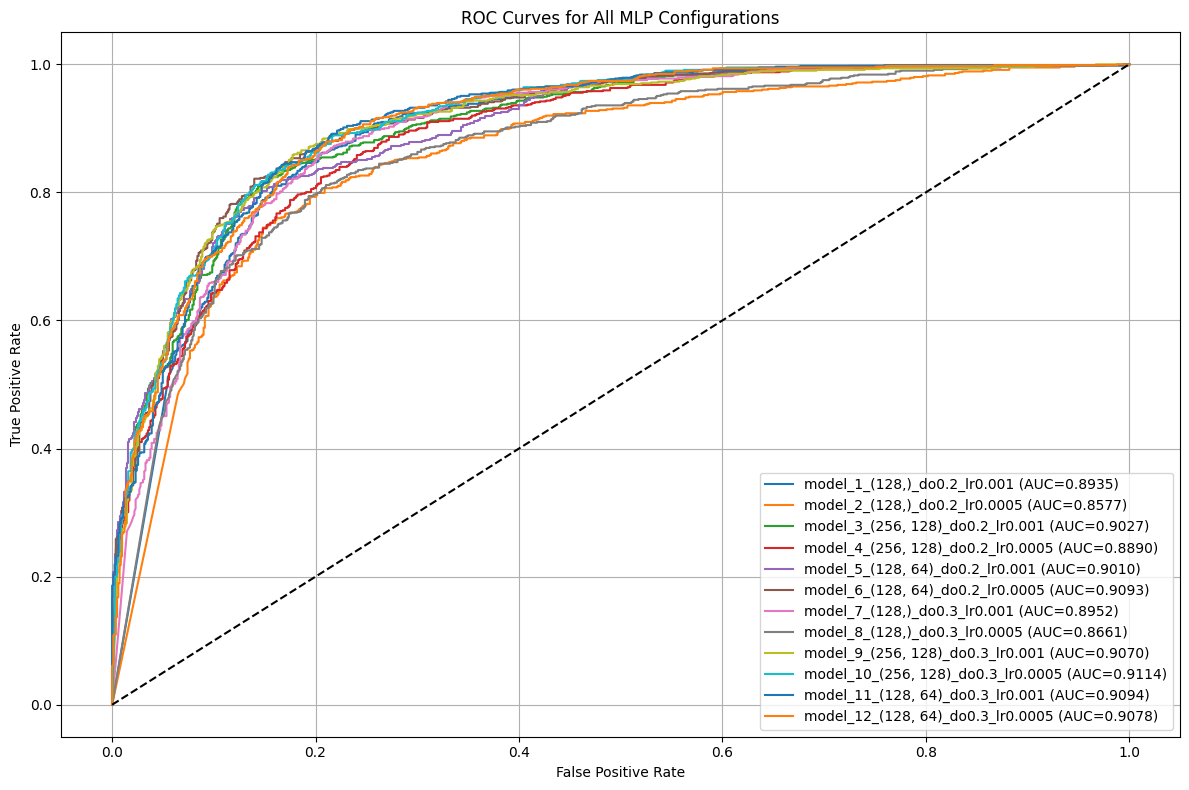


 Best Model Saved!
Best Config: {'dropout_rate': 0.3, 'hidden_layer_sizes': (256, 128), 'learning_rate': 0.0005}
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

 Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       825
           1       0.83      0.85      0.84       815

    accuracy                           0.84      1640
   macro avg       0.84      0.84      0.84      1640
weighted avg       0.84      0.84      0.84      1640

Test ROC-AUC: 0.9146346904629112


In [36]:
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import pickle

def create_mlp(hidden_layer_sizes=(128, 64), dropout_rate=0.3, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(hidden_layer_sizes[0], activation='relu', input_shape=(X_train_mlp.shape[1],)))
    model.add(Dropout(dropout_rate))
    if len(hidden_layer_sizes) > 1:
        for units in hidden_layer_sizes[1:]:
            model.add(Dense(units, activation='relu'))
            model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

param_grid = {
    "hidden_layer_sizes": [(128,), (256, 128), (128, 64)],
    "dropout_rate": [0.2, 0.3],
    "learning_rate": [0.001, 0.0005],
}

configs = list(ParameterGrid(param_grid))
print(f"Total configurations: {len(configs)}")

best_auc = 0
best_model = None
best_config = None

plt.figure(figsize=(12, 8))

for i, config in enumerate(configs):
    print(f"\n🔧 Training model {i+1}/{len(configs)}: {config}")

    model = create_mlp(**config)
    history = model.fit(
        X_train_mlp, y_train_final,
        validation_data=(X_val_mlp, y_val_final),
        epochs=20,
        batch_size=64,
        verbose=1  # suppress detailed output
    )

    # Predict and compute ROC-AUC
    y_prob = model.predict(X_val_mlp).ravel()
    y_pred = (y_prob > 0.5).astype(int)
    auc = roc_auc_score(y_val_final, y_prob)
    fpr, tpr, _ = roc_curve(y_val_final, y_prob)

    config_name = f"model_{i+1}_{config['hidden_layer_sizes']}_do{config['dropout_rate']}_lr{config['learning_rate']}"
    print(f"{config_name} → AUC: {auc:.4f}")

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{config_name} (AUC={auc:.4f})")

    # Save best
    if auc > best_auc:
        best_auc = auc
        best_model = model
        best_config = config

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All MLP Configurations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Save model
best_model.save("best_mlp_model.h5")

# Save config
with open("best_mlp_config.pkl", "wb") as f:
    pickle.dump(best_config, f)

print("\n Best Model Saved!")
print("Best Config:", best_config)

y_test_prob = best_model.predict(X_test_mlp).ravel()
y_test_pred = (y_test_prob > 0.5).astype(int)

print("\n Test Set Evaluation:")
print(classification_report(y_test_final, y_test_pred))
print("Test ROC-AUC:", roc_auc_score(y_test_final, y_test_prob))


In [30]:
# CNN

cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=input_shape_cnn),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

cnn.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN
cnn.fit(X_train_cnn, y_train_final, validation_data=(X_val_cnn, y_val_final),
        epochs=20, batch_size=32, callbacks=[early_stop])

cnn.evaluate(X_test_cnn, y_test_final)

In [ ]:

from sklearn.metrics import classification_report, roc_auc_score

mlp_preds = (mlp.predict(X_test_mlp) > 0.5).astype(int)
cnn_preds = (cnn.predict(X_test_cnn) > 0.5).astype(int)

print("MLP Classification Report:")
print(classification_report(y_test_final, mlp_preds))
print("AUC:", roc_auc_score(y_test_final, mlp.predict(X_test_mlp)))

print("CNN Classification Report:")
print(classification_report(y_test_final, cnn_preds))
print("AUC:", roc_auc_score(y_test_final, cnn.predict(X_test_cnn)))
